<a href="https://colab.research.google.com/github/Rana12408/machinelearning/blob/main/trendyolprojesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
page = 1
url_base = f"https://www.trendyol.com/gunes-urunu-x-c143835?pi={page}"

sirket_list = []
saat_list = []
fiyat_list = []

while page<10:
    pass
    url = f"{url_base}&page={page}"
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        page+=1
    except Exception as e:
        print(f"Hata oluştu: {e}")
        break

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 1
url_base = f"https://www.trendyol.com/gunes-urunu-x-c143835?pi={page}"

sirket_list = []
fiyat_list = []
favori_list = []
aciklama_list = []

while page < 2:
    url = f"{url_base}&page={page}"

    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        page += 1

        # Ürünlerin markasını, fiyatını, favorileme değerini ve açıklamasını çekme
        urunler = soup.find_all("div", class_="product-down")
        for urun in urunler:
            # Marka çekme
            marka = urun.find("span", class_="prdct-desc-cntnr-ttl").get("title", "")
            sirket_list.append(marka)

            # Fiyatı çekme
            fiyat = urun.find("div", class_="prc-box-dscntd")
            if fiyat:
                # Fiyatı temizleme ve dönüştürme
                fiyat_str = fiyat.text.strip().replace(" TL", "").replace(".", "").replace(",", ".")
                fiyat_float = float(fiyat_str)
                fiyat_list.append(fiyat_float)
            else:
                fiyat_list.append(None)

            # Favorileme değerini çekme
            favori = urun.find("p", class_="social-proof-text")
            if favori:
                favori_sayi = favori.find("span", class_="focused-text").text.strip()
                favori_list.append(favori_sayi)
            else:
                favori_list.append(None)

            # Ürün açıklamasını çekme
            aciklama = urun.find("span", class_="prdct-desc-cntnr-name hasRatings")
            if aciklama:
                aciklama_list.append(aciklama.get("title", "").strip())
            else:
                aciklama_list.append(None)

    except Exception as e:
        print(f"Hata oluştu: {e}")
        break

# DataFrame oluşturma
df = pd.DataFrame({
    "Marka": sirket_list,
    "Açıklama": aciklama_list,
    "Fiyat": fiyat_list,
    "Favori Sayısı": favori_list,

})

print(df)


                   Marka                Açıklama   Fiyat Favori Sayısı
0             FreshBelle          Ton Eşitleyici  224.07    1000+ ürün
1                CALLİEL        Ton Eşitleyici ,  301.50     250+ ürün
2                FONDEST          Ton Eşitleyici  269.00     500+ ürün
3                Sebamed      Çok Yönlü Koruyucu  389.90     6091 kişi
4                ADARİSE   Ton Eşitleyici 50spf+  232.00     500+ ürün
5               The Ceel        Leke Karşıtı Ton  299.90     500+ ürün
6                MELADES   Ton Eşitleyici 50spf+  226.00     500+ ürün
7                 Licape     Spf 50 Faktör Uva -  315.00    1000+ ürün
8             ALİSBEAUTY          Ton Eşitleyici  265.50     500+ ürün
9             Minelacare        Leke Ve Yaşlanma  367.90    20.3B kişi
10               LEODİNS        Leke Karşıtı Tüm  378.00     250+ ürün
11                 Sinoz  Pink Touch Spf 50 Cilt  175.67    1500+ ürün
12            Clasy Care         Clinical Spf 50  209.00     100+ ürün
13    

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 1
url_base = f"https://www.trendyol.com/gunes-urunu-x-c143835?pi={page}"

sirket_list = []
fiyat_list = []
favori_list = []
aciklama_list = []

while page < 10:
    url = f"{url_base}&page={page}"

    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        page += 1

        # Ürünlerin markasını, fiyatını, favorileme değerini ve açıklamasını çekme
        urunler = soup.find_all("div", class_="product-down")
        for urun in urunler:
            # Marka çekme
            marka = urun.find("span", class_="prdct-desc-cntnr-ttl").get("title", "")
            sirket_list.append(marka)

            # Fiyatı çekme
            fiyat = urun.find("div", class_="prc-box-dscntd")
            if fiyat:
                # Fiyatı temizleme ve dönüştürme
                fiyat_str = fiyat.text.strip().replace(" TL", "").replace(".", "").replace(",", ".")
                fiyat_float = float(fiyat_str)
                fiyat_list.append(fiyat_float)
            else:
                fiyat_list.append(None)

            # Favorileme değerini çekme
            favori = urun.find("p", class_="social-proof-text")
            if favori:
                favori_sayi_str = favori.find("span", class_="focused-text").text.strip().replace(" kişi", "").replace("+", "").replace("B", "").replace("ürün", "").replace(".", "")
                try:
                    favori_sayi = int(favori_sayi_str)
                except ValueError:
                    favori_sayi = None
                favori_list.append(favori_sayi)
            else:
                favori_list.append(None)

            # Ürün açıklamasını çekme
            aciklama = urun.find("span", class_="prdct-desc-cntnr-name hasRatings")
            if aciklama:
                aciklama_list.append(aciklama.get("title", "").strip())
            else:
                aciklama_list.append(None)

    except Exception as e:
        print(f"Hata oluştu: {e}")
        break

# DataFrame oluşturma
df = pd.DataFrame({
    "Marka": sirket_list,
    "Açıklama": aciklama_list,
    "Fiyat": fiyat_list,
    "Favori Sayısı": favori_list,
})

print(df)


                   Marka               Açıklama   Fiyat  Favori Sayısı
0             FreshBelle         Ton Eşitleyici  224.07           1000
1                CALLİEL       Ton Eşitleyici ,  301.50            250
2                FONDEST         Ton Eşitleyici  269.00            500
3                Sebamed     Çok Yönlü Koruyucu  389.90           6091
4                ADARİSE  Ton Eşitleyici 50spf+  232.00            500
..                   ...                    ...     ...            ...
211               Licape     Yüksek Koruma Suya  483.00            250
212  WOU World of Unique                    TON  308.90            307
213               Licape       Çok Yönlü Yüksek  275.00            250
214       rise and shine            Güneş Kremi  124.90            250
215             DEOPROCE        Sun Stick Güneş  491.10            207

[216 rows x 4 columns]


In [ ]:
!pip install collections-extended

In [ ]:
import numpy as np

def aykiri_deger_tespit(df, kolonlar):
    indeksler = []
    for kolon in kolonlar:
        Q1 = df[kolon].quantile(0.25)
        Q3 = df[kolon].quantile(0.75)
        IQR = Q3 - Q1
        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR
        aykiri_indeksler = df[(df[kolon] < alt_sinir) | (df[kolon] > ust_sinir)].index
        indeksler.extend(aykiri_indeksler)
    return np.unique(indeksler)

# DataFrame'deki fiyat sütununda aykırı değerleri tespit etme
aykiri_indeksler = aykiri_deger_tespit(df, ["Fiyat"])

# Aykırı değerlerin indekslerini göster
print("Aykırı değerlerin indeksleri:", aykiri_indeksler)


Aykırı değerlerin indeksleri: [ 19  23  43  47  67  71  91  95 115 119 139 143 163 167 187 191 211 215]


In [ ]:
df.iloc[aykiri_indeksler]

,Marka,Açıklama,Fiyat,Favori Sayısı
19,Licape,Yüksek Koruma Suya,483.0,250
23,DEOPROCE,Sun Stick Güneş,491.1,207
43,Licape,Yüksek Koruma Suya,483.0,250
47,DEOPROCE,Sun Stick Güneş,491.1,207
67,Licape,Yüksek Koruma Suya,483.0,250
71,DEOPROCE,Sun Stick Güneş,491.1,207
91,Licape,Yüksek Koruma Suya,483.0,250
95,DEOPROCE,Sun Stick Güneş,491.1,207
115,Licape,Yüksek Koruma Suya,483.0,250
119,DEOPROCE,Sun Stick Güneş,491.1,207


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Fiyat'].plot(kind='hist', bins=20, title='Fiyat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Favori Sayısı'].plot(kind='hist', bins=20, title='Favori Sayısı')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Marka').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Açıklama').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Fiyat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Fiyat', y='Favori Sayısı', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Fiyat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Marka')):
  _plot_series(series, series_name, i)
  fig.legend(title='Marka', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Fiyat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Fiyat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Açıklama')):
  _plot_series(series, series_name, i)
  fig.legend(title='Açıklama', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Fiyat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Favori Sayısı']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Marka')):
  _plot_series(series, series_name, i)
  fig.legend(title='Marka', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Favori Sayısı')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Favori Sayısı']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Açıklama')):
  _plot_series(series, series_name, i)
  fig.legend(title='Açıklama', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Favori Sayısı')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Fiyat'].plot(kind='line', figsize=(8, 4), title='Fiyat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Favori Sayısı'].plot(kind='line', figsize=(8, 4), title='Favori Sayısı')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Açıklama'].value_counts()
    for x_label, grp in _df_14.groupby('Marka')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Marka')
_ = plt.ylabel('Açıklama')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Marka'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='Marka', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Açıklama'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Açıklama', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Marka'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Fiyat', y='Marka', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Açıklama'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Fiyat', y='Açıklama', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
new_df = df.drop(aykiri_indeksler)
new_df

,Marka,Açıklama,Fiyat,Favori Sayısı
0,FreshBelle,Ton Eşitleyici,224.07,1000
1,CALLİEL,"Ton Eşitleyici ,",301.50,250
2,FONDEST,Ton Eşitleyici,269.00,500
3,Sebamed,Çok Yönlü Koruyucu,389.90,6091
4,ADARİSE,Ton Eşitleyici 50spf+,232.00,500
...,...,...,...,...
209,Licape,Hassas Ve Kuru Ciltler,298.00,250
210,mdb,Sebamed Güneş Kremi 50,300.00,1037
212,WOU World of Unique,TON,308.90,307
213,Licape,Çok Yönlü Yüksek,275.00,250


In [ ]:
new_df.groupby("Marka")["Fiyat"].mean()

Marka
ADARİSE                 232.00
ALİSBEAUTY              265.50
CALLİEL                 300.25
Clasy Care              209.00
FONDEST                 269.00
FreshBelle              224.07
LEODİNS                 378.00
Licape                  296.00
Licorael Dubai          192.94
MELADES                 226.00
Minelacare              367.90
Sebamed                 389.90
Sinoz                   175.67
Thalia                  266.63
The Ceel                299.90
The Purest Solutions    299.90
WOU World of Unique     308.90
mdb                     300.00
rise and shine          124.90
Name: Fiyat, dtype: float64

<Axes: xlabel='Marka'>

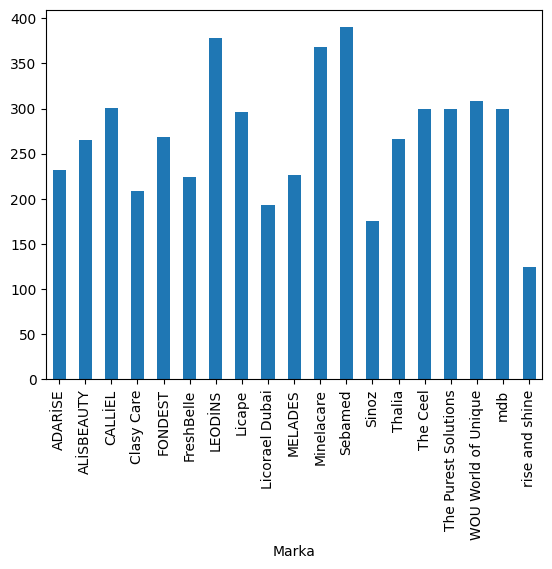

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
new_df.groupby("Marka")["Fiyat"].mean().plot(kind="bar")

In [ ]:
new_df_grouped = new_df.groupby("Marka")["Fiyat"].mean()

In [ ]:
marka_adi = input("Marka adı girin: ")
print(new_df[new_df["Marka"].str.lower().str.casefold() == marka_adi.lower().casefold() ]["Fiyat"].mean())
# Apply .str.lower() and .str.casefold() to each element in the Series
matches =new_df[new_df['Marka'].str.contains(marka_adi, case=False, na=False)]

if not matches.empty:
    print("Ürün bulundu:")
    print( matches.groupby("Marka")["Fiyat"].mean())
else:
    print("Ürün bulunamadı.")

Marka adı girin: SİNOZ
nan
Ürün bulundu:
Marka
Sinoz    175.67
Name: Fiyat, dtype: float64


In [ ]:
min_fiyat = float(input("Minimum fiyatı girin: "))
max_fiyat = float(input("Maksimum fiyatı girin: "))
filtreli_df = new_df[(new_df["Fiyat"] >= min_fiyat) & (new_df["Fiyat"] <= max_fiyat)]
markalar = filtreli_df["Marka"].tolist()
if markalar:
    print(f"Belirtilen fiyat aralığında olan markalar: {markalar}")
else:
    print("Belirtilen fiyat aralığında ürün bulunamadı.")

Minimum fiyatı girin: 250
Maksimum fiyatı girin: 350
Belirtilen fiyat aralığında olan markalar: ['CALLİEL', 'FONDEST', 'The Ceel', 'Licape', 'ALİSBEAUTY', 'The Purest Solutions', 'CALLİEL', 'Thalia', 'Licape', 'mdb', 'WOU World of Unique', 'Licape', 'CALLİEL', 'FONDEST', 'The Ceel', 'Licape', 'ALİSBEAUTY', 'The Purest Solutions', 'CALLİEL', 'Thalia', 'Licape', 'mdb', 'WOU World of Unique', 'Licape', 'CALLİEL', 'FONDEST', 'The Ceel', 'Licape', 'ALİSBEAUTY', 'The Purest Solutions', 'CALLİEL', 'Thalia', 'Licape', 'mdb', 'WOU World of Unique', 'Licape', 'CALLİEL', 'FONDEST', 'The Ceel', 'Licape', 'ALİSBEAUTY', 'The Purest Solutions', 'CALLİEL', 'Thalia', 'Licape', 'mdb', 'WOU World of Unique', 'Licape', 'CALLİEL', 'FONDEST', 'The Ceel', 'Licape', 'ALİSBEAUTY', 'The Purest Solutions', 'CALLİEL', 'Thalia', 'Licape', 'mdb', 'WOU World of Unique', 'Licape', 'CALLİEL', 'FONDEST', 'The Ceel', 'Licape', 'ALİSBEAUTY', 'The Purest Solutions', 'CALLİEL', 'Thalia', 'Licape', 'mdb', 'WOU World of Uniq